In [1]:
from transformers.utils import logging
logging.set_verbosity_error()

In [2]:
from transformers import pipeline
sam_pipe = pipeline("mask-generation", "Zigeng/SlimSAM-uniform-77")

config.json:   0%|          | 0.00/364 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/38.9M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

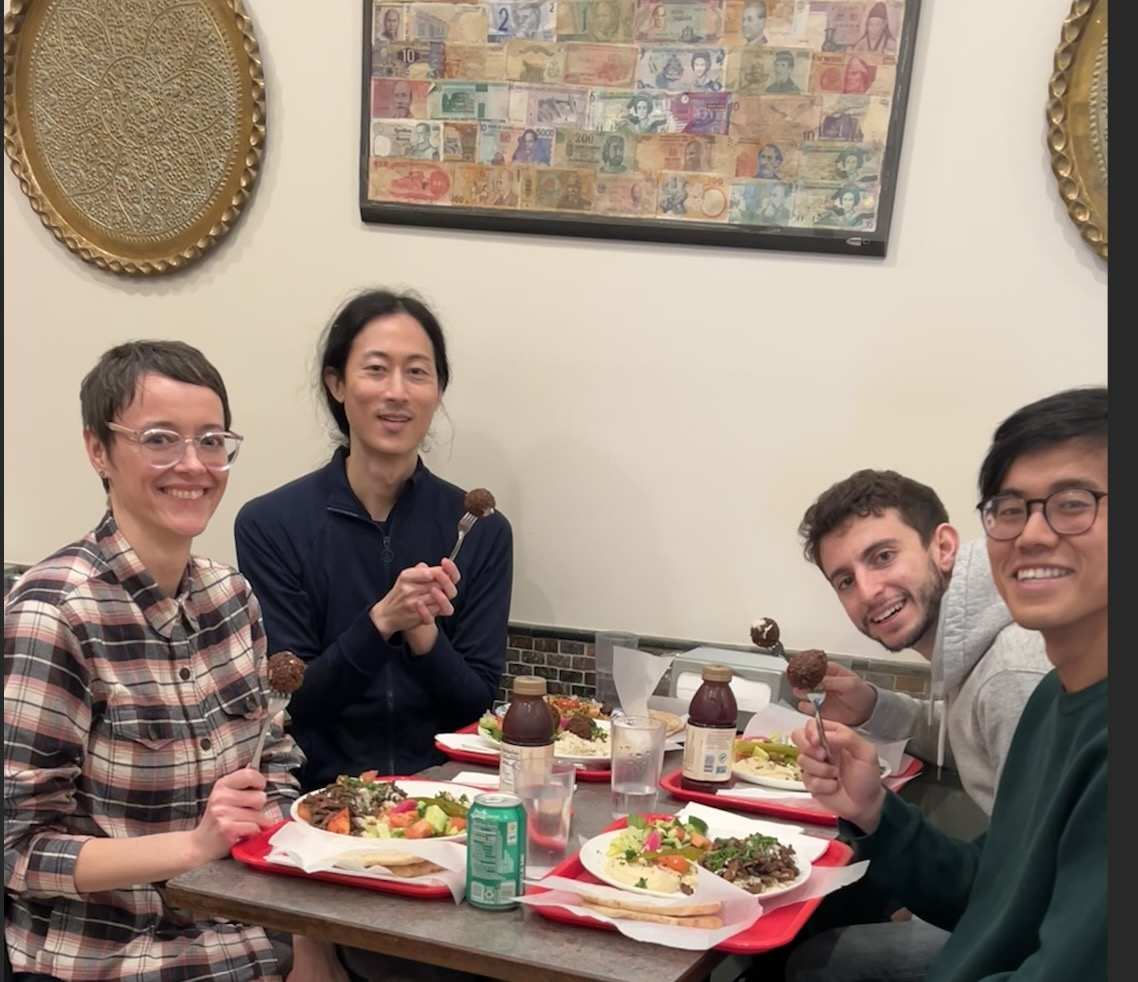

In [3]:
from PIL import Image
raw_image = Image.open("friends.jpg")
raw_image

In [25]:
output = sam_pipe(raw_image, point_per_batch=32)

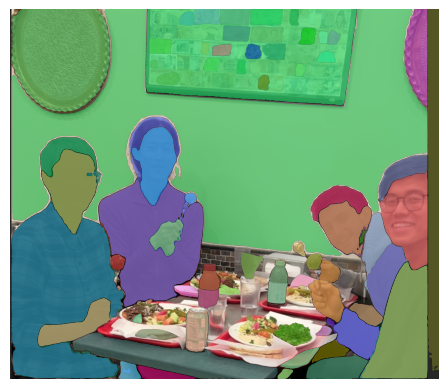

In [26]:
from helper import show_pipe_masks_on_image
image_output = show_pipe_masks_on_image(raw_image, output)

In [8]:
from transformers import SamModel, SamProcessor
model = SamModel.from_pretrained("Zigeng/SlimSAM-uniform-77")
processor = SamProcessor.from_pretrained("Zigeng/SlimSAM-uniform-77")

In [9]:
model

SamModel(
  (shared_image_embedding): SamPositionalEmbedding()
  (vision_encoder): SamVisionEncoder(
    (patch_embed): SamPatchEmbeddings(
      (projection): Conv2d(3, 168, kernel_size=(16, 16), stride=(16, 16))
    )
    (layers): ModuleList(
      (0-11): 12 x SamVisionLayer(
        (layer_norm1): LayerNorm((168,), eps=1e-06, elementwise_affine=True)
        (attn): SamVisionAttention(
          (qkv): Linear(in_features=168, out_features=504, bias=True)
          (proj): Linear(in_features=168, out_features=168, bias=True)
        )
        (layer_norm2): LayerNorm((168,), eps=1e-06, elementwise_affine=True)
        (mlp): SamMLPBlock(
          (lin1): Linear(in_features=168, out_features=696, bias=True)
          (lin2): Linear(in_features=696, out_features=168, bias=True)
          (act): GELUActivation()
        )
      )
    )
    (neck): SamVisionNeck(
      (conv1): Conv2d(168, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (layer_norm1): SamLayerNorm()
      (c

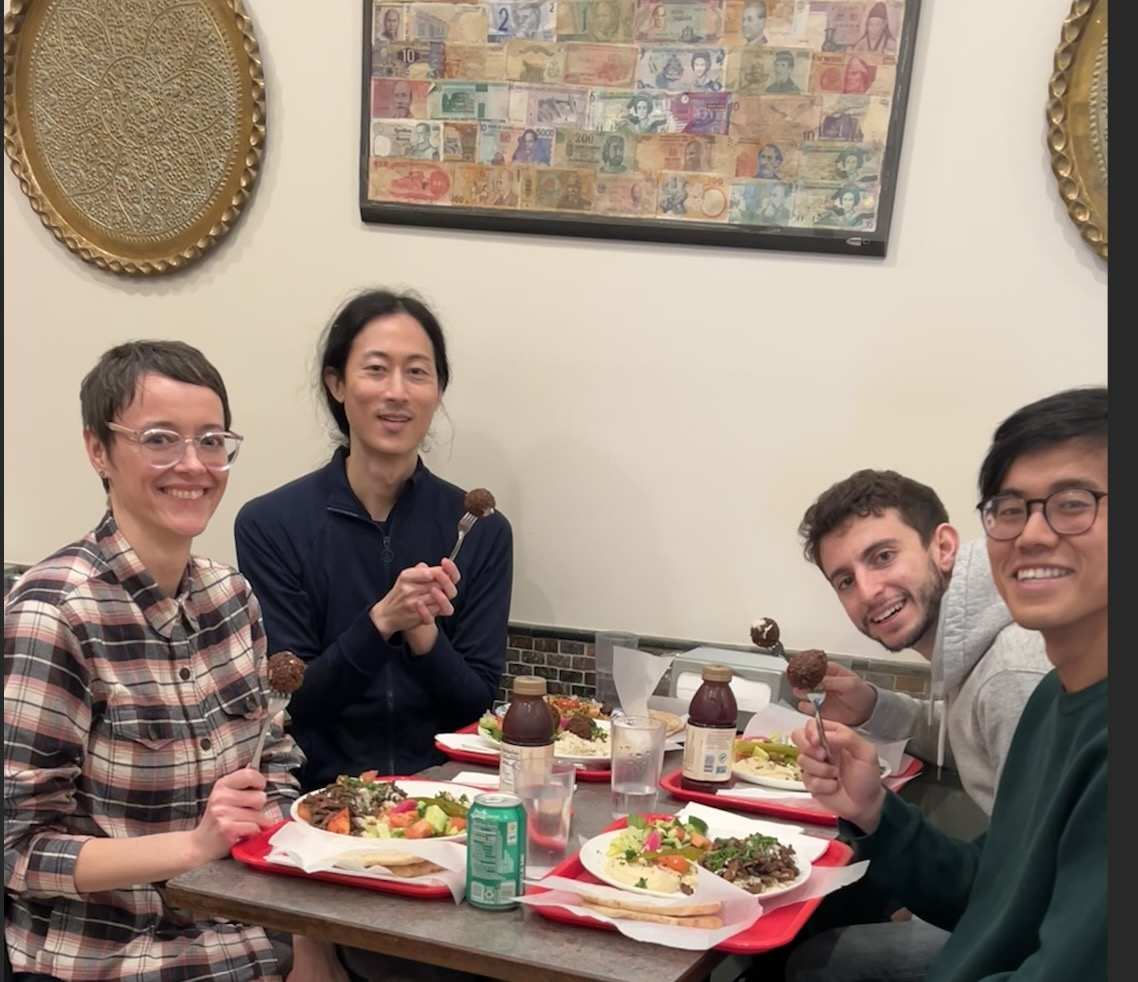

In [10]:
raw_image

In [38]:
input_points=[[[1600,700]]]

In [39]:
inputs = processor(raw_image,input_points=input_points,return_tentors="pt")

In [40]:
import torch
with torch.no_grad():
    outputs = model(**inputs)

ValueError: ('The input_points must be a 4D tensor. Of shape `batch_size`, `point_batch_size`, `nb_points_per_image`, `2`.', ' got (1, 1, 2).')